# NPY format

Some links:

* [NPY Spec](http://docs.scipy.org/doc/numpy-dev/neps/npy-format.html)
* [C++ library](https://github.com/rogersce/cnpy)

## Scope

The initial MATLAB implementation could have the following limitations:

* **Supported data types**: `bool`, `[u]int[8|16|32|64]`, `float32`, `float64` (no strings for now?). **No support for record arrays**.
* **C order only**: an error is raised if FORTRAN order is used.
* **Arbitrary number of dimensions**: if a generic implementation supporting ndarrays is not possible, then it is okay to only support 1, 2, and 3 dimensions, and raise an error if there are more dimensions.

## Sample datasets

Here are a few sample datasets.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset 1: 1D sine

In [3]:
n = 10000
t = np.linspace(-10., 10., n)

In [4]:
sine = (1 + np.sin(t)) * 64

In [5]:
sine.shape, sine.dtype

((10000,), dtype('float64'))

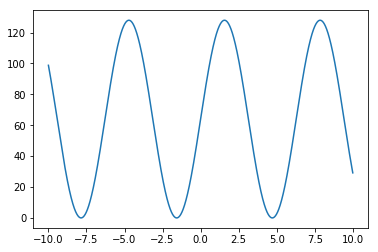

In [6]:
plt.plot(t, sine)

### Dataset 2: 2D image

In [7]:
import skimage.data
chelsea = skimage.data.chelsea()

In [8]:
chelsea.shape

(300, 451, 3)

In [9]:
chelsea.dtype

dtype('uint8')

In [10]:
chelsea[:3,:3]

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109]]], dtype=uint8)

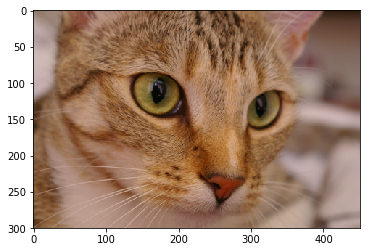

In [11]:
plt.imshow(chelsea)

## Data types

We save these two datasets in all supported data types.

In [12]:
dtypes = 'uint8,uint16,uint32,uint64,int8,int16,int32,int64,float32,float64'.split(',')

In [13]:
import os
if not os.path.exists('data'):
    os.mkdir('data')

In [14]:
for dtype in dtypes:
    sine_tr = sine.astype(dtype)
    np.save('data/sine_{}.npy'.format(dtype), sine_tr)
    
    chelsea_tr = chelsea.astype(dtype)
    np.save('data/chelsea_{}.npy'.format(dtype), chelsea_tr)

In [15]:
%ls data

chelsea_float32.npy*         matlab_sine_float64.npy*
chelsea_float64.npy*         matlab_sine_int16.npy*
chelsea_int16.npy*           matlab_sine_int32.npy*
chelsea_int32.npy*           matlab_sine_int64.npy*
chelsea_int64.npy*           matlab_sine_int8.npy*
chelsea_int8.npy*            matlab_sine_uint16.npy*
chelsea_uint16.npy*          matlab_sine_uint32.npy*
chelsea_uint32.npy*          matlab_sine_uint64.npy*
chelsea_uint64.npy*          matlab_sine_uint8.npy*
chelsea_uint8.npy*           sine_float32.npy*
matlab_chelsea_float32.npy*  sine_float64.npy*
matlab_chelsea_float64.npy*  sine_int16.npy*
matlab_chelsea_int16.npy*    sine_int32.npy*
matlab_chelsea_int32.npy*    sine_int64.npy*
matlab_chelsea_int64.npy*    sine_int8.npy*
matlab_chelsea_int8.npy*     sine_uint16.npy*
matlab_chelsea_uint16.npy*   sine_uint32.npy*
matlab_chelsea_uint32.npy*   sine_uint64.npy*
matlab_chelsea_uint64.npy*   sine_uint8.npy*
matlab_chelsea_uint8.npy*    test.npy*
matlab_sine_float32.npy*


We check the saved arrays:

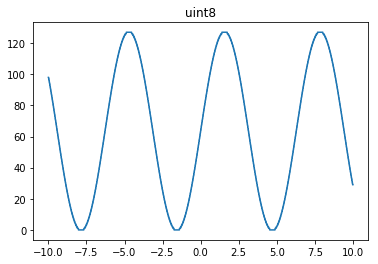

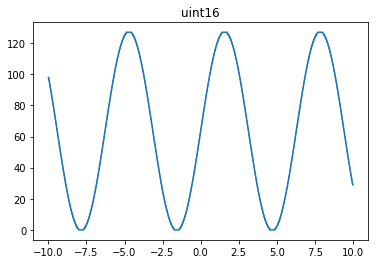

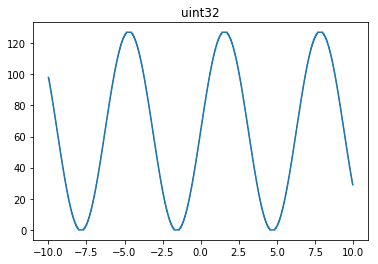

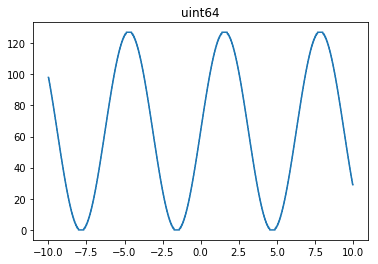

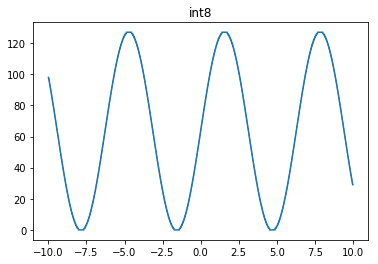

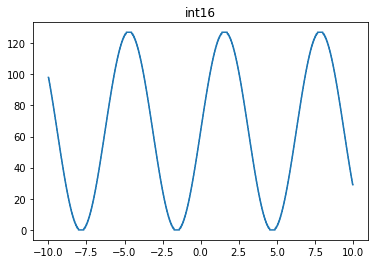

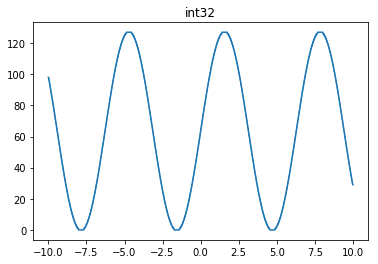

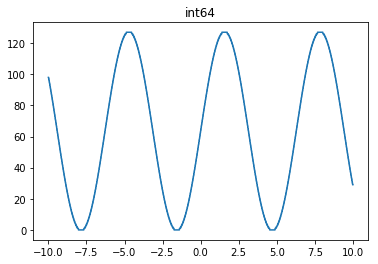

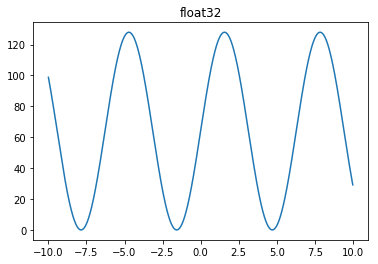

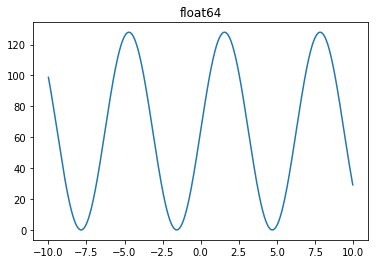

In [16]:
for dtype in dtypes:
    x = np.load('data/sine_{}.npy'.format(dtype))
    #x = np.load('data/matlab_sine_{}.npy'.format(dtype))
    plt.figure()
    plt.plot(t, x)
    plt.title(dtype)

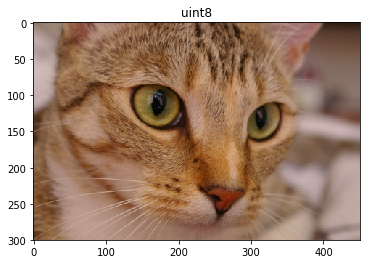

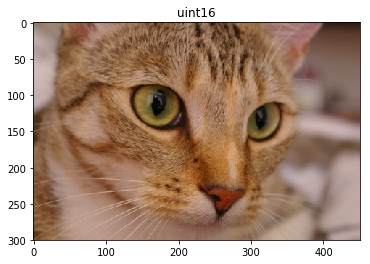

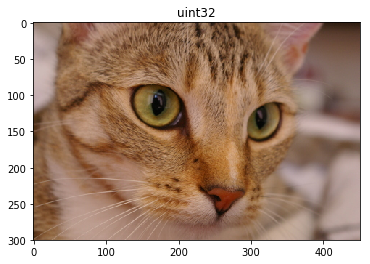

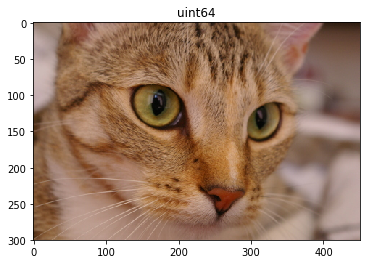

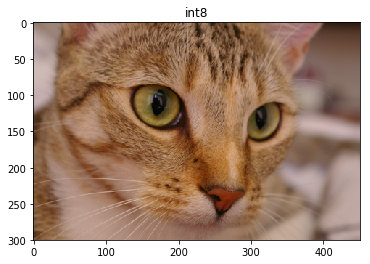

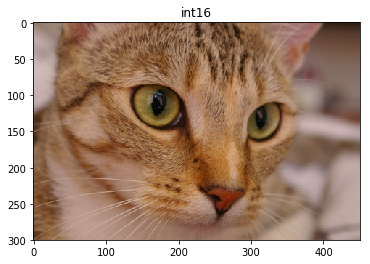

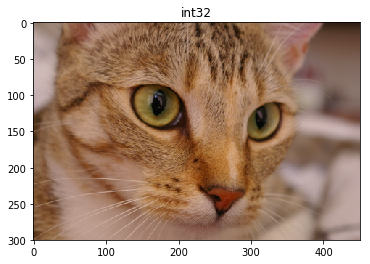

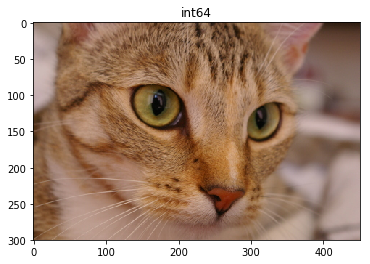

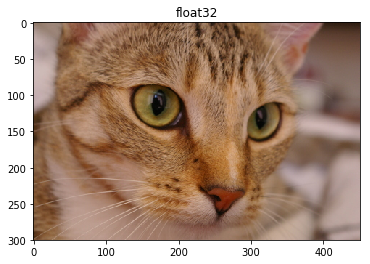

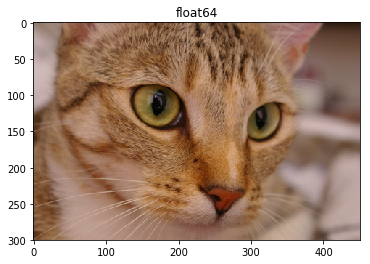

In [17]:
for dtype in dtypes:
#     img = np.load('data/chelsea_{}.npy'.format(dtype))
    img = np.load('data/matlab_chelsea_{}.npy'.format(dtype))
    plt.figure()
    plt.imshow(img.astype('uint8'))
    plt.title(dtype)